# SNU 2019 전형 간 성비

[중앙일보의 1월 31일자 보도](https://news.joins.com/article/23340117)에 따르면 서울대 정시에서 남학생의 합격률은 여학생의 3배로 수시와 크게 다르다고 한다

입학처에서 제공하는 학과/학부 별 성비와 전형별 선발인원을 이용해 이 차이에 대해 알아보자!
성비는 [대학알리미](http://www.academyinfo.go.kr/), 선발인원은 [서울대학교 입학처](http://admission.snu.ac.kr/index.html)의 자료를 활용하였다.

아직 2019 입시 결과가 최종적으로 대학 알리미에 입력되지 않았기 때문에 성비는 부득이하게 2018년의 정보를 활용하였다.

### 0. 중앙일보의 보도
중앙일보의 보도에 따르면 수시와 정시에서의 여학생 비율은 2010년도에는 42.5%, 35.9%이며 2019년도에는 44.8%, 24.4% 였다.

In [36]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load parameters
params = pd.read_csv('snu2019_utf8.csv', index_col=1)

# Configure korean font for matplotlib
plt.rcParams['font.family'] = 'NanumBarunGothic'



### 1. 학과별 전형 비율
남초학과는 수시 모집인원이 많고 여초학과는 정시 모집인원이 많다면 어떨까?  
 이러한 상황에서는 전형별로 성비 차이가 존재하지 않더라도 정시에서 남학생이 강세를 보일 수 있다. 

학과별 전형 비율의 영향을 조사해보자.

##### Point Estimate

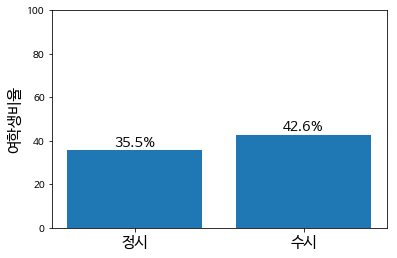

In [56]:
# compute the point estimate
w_j_ratio = (params['정시최종']*params['여/전체']).sum() \
               / params['정시최종'].sum() # 정시합격생 중 여학생 비율
w_s_ratio = (params['수시최종']*params['여/전체']).sum() \
                / params['수시최종'].sum() # 수시합격생 중 여학생 비율

    
# draw plot
data = pd.Series([w_j_ratio, w_s_ratio]) * 100
fig, ax = plt.subplots(1)
bar = ax.bar(x=['정시','수시'],height=data)

ax.set_xticklabels(['정시','수시'], rotation=0, fontsize=15)
ax.set_ylim([0,100])
ax.set_ylabel('여학생비율', fontsize=15)

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x()+rect.get_width()/2, height, str(int(10*height)/10)+'%', 
             ha='center', va='bottom', fontsize=14)
    

결과에서 보듯이 7% 가량의 차이가 발생함을 알 수 있다.  
중앙일보가 보도한 20% 중 7%는 전형별 성차가 존재하지 않아도 발생할 수 있다는 말이다.  

##### Monte Carlo Simulation
그렇다면 이 상황에서 2019년의 결과가 발생할 확률을 계산해보자.

(0, 20)

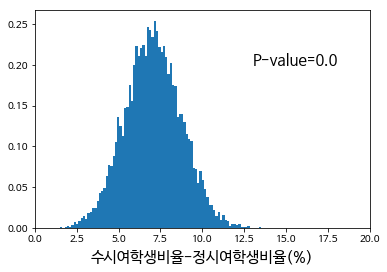

In [73]:
# Monte Carlo Simulation
N_mc = 10000
diffs = []
n = 0
for i in range(N_mc):
    w_j = np.random.binomial(params['정시최종'], params['여/전체']).sum()
    w_s = np.random.binomial(params['수시최종'], params['여/전체']).sum()
    w_j_ratio = w_j / params['정시최종'].sum()
    w_s_ratio = w_s / params['수시최종'].sum()
    
    diff = (w_s_ratio-w_j_ratio)*100
    diffs.append(diff)
    if diff > 20:
        n+=1

plt.hist(diffs,bins=101,density=True)
plt.xlabel('수시여학생비율-정시여학생비율(%)', fontsize=15)
plt.text(x=13, y=0.2, s='P-value='+str(int(n/N_mc*10)/10), fontsize=15)
plt.xlim([0,20])
    

우리의 영가설 하에서 수시 여학생과 정시 여학생 사이의 차이는 통계적으로 매우 유의하다는 것을 알 수 있다.  
영가설: $$P(여성|정시합격자) = P(여성|수시합격자)$$는 틀렸을 가능성이 높다. 

## 2. 정시 및 수시의 지원자 성비

1. 정시는 재수생 지원자가 수시에서보다 많다.
1. [에듀진의 18.03.19 보도](http://www.edujin.co.kr/news/articleView.html?idxno=18445)에 따르면 재수생 중 남학생의 비율은 57%로 여학생보다 약 13% 많은 것으로 집계됐다.